# 0. Goals: Classification





In [2]:
# Importing libraries
import pandas as pd
import numpy as np

from datetime import datetime

# Importing libraries for reading dataset
import io

# Importing libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Importing libraries for Preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importing libraries for Evaluation
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Uploading csv files into google colab
from google.colab import files
uploaded = files.upload()

Saving air_bnb.csv to air_bnb.csv


In [0]:
# storing dataset to dataframe df
df = pd.read_csv(io.BytesIO(uploaded['air_bnb.csv']))
# Dataset is now stored in a Pandas Dataframe

# 1. Exploratory Data Analysis


## Data Exploration

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


### Variable identification

In [6]:
# Columns explaination
df.columns
# columns                             : 'id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
#                                       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
#                                       'minimum_nights', 'number_of_reviews', 'last_review',
#                                       'reviews_per_month', 'calculated_host_listings_count',
#                                       'availability_365'
# -------------------------------------------------------------------------------------------------------------------------------------
# id                                  : id of the listing, represented by int64, each id is unique
# name                                : name of the listing, represented by a string, has 59 null values
# host_id                             : id of the owner, represented by int64 there are 19180 host_id in 22552 data
# host_name                           : name of the owner, represented by a string, has 29 null values
# neighbourhood_group                 : Group of neighbourhood in Berlin. Represented by 12 categorical feature represented by 
#                                       Friedrichshain-Kreuzberg    5497
#                                       Mitte                       4631
#                                       Pankow                      3541
#                                       Neukölln                    3499
#                                       Charlottenburg-Wilm.        1592
#                                       Tempelhof - Schöneberg      1560
#                                       Lichtenberg                  688
#                                       Treptow - Köpenick           595
#                                       Steglitz - Zehlendorf        437
#                                       Reinickendorf                247
#                                       Marzahn - Hellersdorf        141
#                                       Spandau                      124
# neighbourhood                       : neighbourhood names. Represented by 136 unique categorical feature 
# latitude                            : Latitude of the listings. Unique set of float64
# longitude                           : Longitude of the listings. Unique set of float64
# room_type                           : Types of room in the listing. Categorical feature represented by 3 groups 'Entire home/apt', 'Private room', 'Shared room'
# price                               : Prices of the listing. 295 prices represented by int64
# minimum_nights                      : The minimum amount of nights to stay in the listing. 102 unique int64
# number_of_reviews                   : Number of review in the listing. 306 unique int64
# last_review                         : Last recorded review date of the listing1313 different dates of the last review, contains 3908 NULL Values
# reviews_per_month                   : The average reviews per month of  the listing. 769 unique float64
# calculated_host_listings_count      : The number of listing the host has. 23 unique int64, how many listing a host has.
# availability_365                    : Number of days it is available in a year. 366 unique int64

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

id, name, host_id, host_name will not be used in this experiment

In [0]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name'])

### Count the number of records

In [8]:
df.shape

(22552, 12)

### Look for Missing Values

In [9]:
df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3908
reviews_per_month                 3914
calculated_host_listings_count       0
availability_365                     0
dtype: int64

There are missing values in last_review and reviews_per month.

In [0]:
missing = df[['number_of_reviews','last_review','reviews_per_month']].copy()

In [11]:
missing.loc[missing['number_of_reviews']==0,:].shape

(3890, 3)

There are 3890 0 values in number of reviews.

In [12]:
missing.loc[((missing['number_of_reviews']==0) & (missing['last_review'].isnull())),:]

,number_of_reviews,last_review,reviews_per_month
7,0,NaN,NaN
44,0,NaN,NaN
47,0,NaN,NaN
166,0,NaN,NaN
171,0,NaN,NaN
...,...,...,...
22547,0,NaN,NaN
22548,0,NaN,NaN
22549,0,NaN,NaN
22550,0,NaN,NaN


There are 3890 rows with 0 values in number_of_reviews and null values in last_review. We can safely assume that these null values are caused by no review of the listing.

In [13]:
missing.loc[((missing['number_of_reviews']==0) & (missing['reviews_per_month'].isnull())),:]

,number_of_reviews,last_review,reviews_per_month
7,0,NaN,NaN
44,0,NaN,NaN
47,0,NaN,NaN
166,0,NaN,NaN
171,0,NaN,NaN
...,...,...,...
22547,0,NaN,NaN
22548,0,NaN,NaN
22549,0,NaN,NaN
22550,0,NaN,NaN


There are 3890 rows with 0 values in number_of_reviews and null values in reviews_per_month. We can safely assume that these null values are caused by no review of the listing.

last_review                       3908
reviews_per_month                 3914

Since last_review has 3908 missing values

3908 - 3890 = 18

it only has 18 missing values

Since reviews_per_month has 3914 missing values

3914 - 3890 = 24

it only has 24 missing values

In [0]:
mean_reviews_per_month = missing['reviews_per_month'].mean()

In [0]:
idx_reviews_per_month =  missing.loc[((missing['number_of_reviews']==0) & (missing['reviews_per_month'].isnull())),:].index

In [16]:
missing['reviews_per_month'][idx_reviews_per_month] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
missing['reviews_per_month'][idx_reviews_per_month]

7        0.0
44       0.0
47       0.0
166      0.0
171      0.0
        ... 
22547    0.0
22548    0.0
22549    0.0
22550    0.0
22551    0.0
Name: reviews_per_month, Length: 3890, dtype: float64

In [18]:
missing['reviews_per_month'].isnull().sum()

24

These missing values will be filled with mean

In [19]:
mean_reviews_per_month

1.1355252709518162

In [0]:
missing['reviews_per_month'] = missing['reviews_per_month'].fillna(mean_reviews_per_month)

In [21]:
missing['reviews_per_month'].isnull().sum()

0

There are no missing values in reviews_per_month

In [0]:
mode_last_review = missing['last_review'].mode()

In [0]:
idx_last_review =  missing.loc[((missing['number_of_reviews']==0) & (missing['last_review'].isnull())),:].index

In [24]:
missing['last_review'][idx_last_review] = '0000/00/00'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
missing['last_review'][idx_last_review]

7        0000/00/00
44       0000/00/00
47       0000/00/00
166      0000/00/00
171      0000/00/00
            ...    
22547    0000/00/00
22548    0000/00/00
22549    0000/00/00
22550    0000/00/00
22551    0000/00/00
Name: last_review, Length: 3890, dtype: object

In [26]:
missing['last_review'].isnull().sum()

18

These missing values will be filled with mode

In [27]:
mode_last_review[0]

'2018-11-04'

In [0]:
missing['last_review'] = missing['last_review'].fillna(value=mode_last_review[0])

In [29]:
missing['last_review'].isnull().sum()

0

In [0]:
df[['last_review','reviews_per_month']] = missing[['last_review','reviews_per_month']]

In [31]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Verify the distribution of each

In [32]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,52.509824,13.406107,67.143668,7.157059,17.840679,0.939658,1.918233,79.852829
std,0.030825,0.057964,220.266210,40.665073,36.769624,1.435668,3.667257,119.368162
min,52.345803,13.103557,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.489065,13.375411,30.000000,2.000000,1.000000,0.060000,1.000000,0.000000
50%,52.509079,13.416779,45.000000,2.000000,5.000000,0.340000,1.000000,4.000000
75%,52.532669,13.439259,70.000000,4.000000,16.000000,1.180000,1.000000,129.000000
max,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


### Search for outliers

In [33]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

latitude

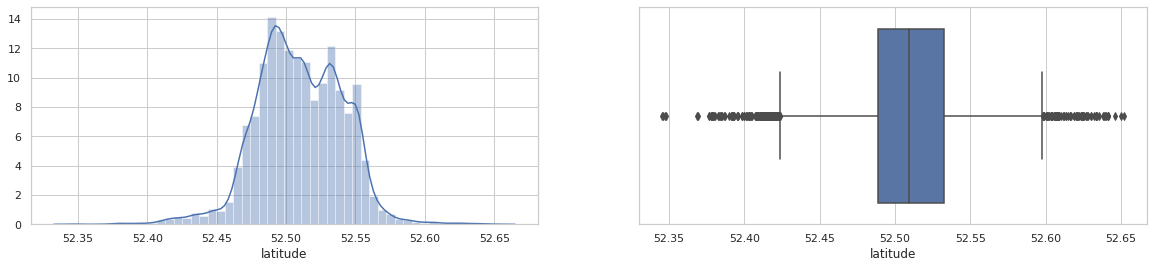

In [34]:
# latitude
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['latitude'])
f.add_subplot(1,2,2)
sns.boxplot(df['latitude'])

longitude

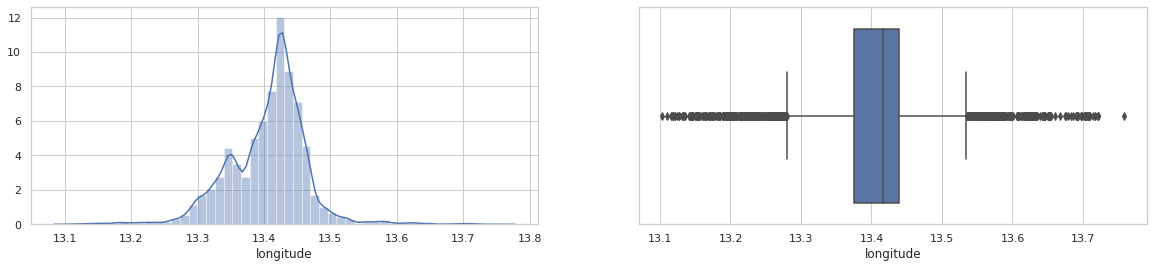

In [35]:
# longitude
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['longitude'])
f.add_subplot(1,2,2)
sns.boxplot(df['longitude'])

price

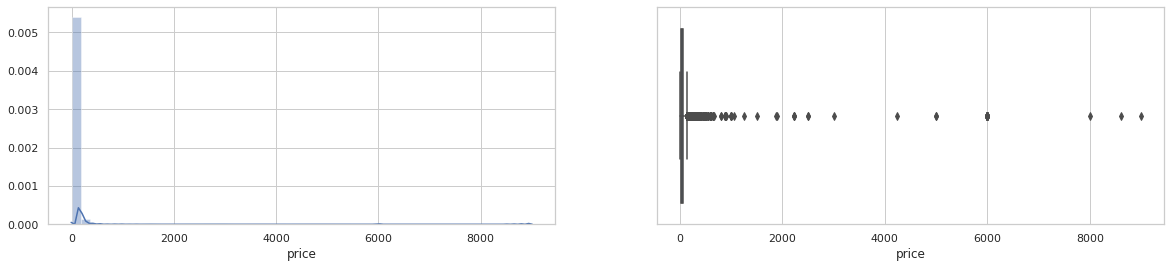

In [36]:
# price
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['price'])
f.add_subplot(1,2,2)
sns.boxplot(df['price'])

minimum_nights

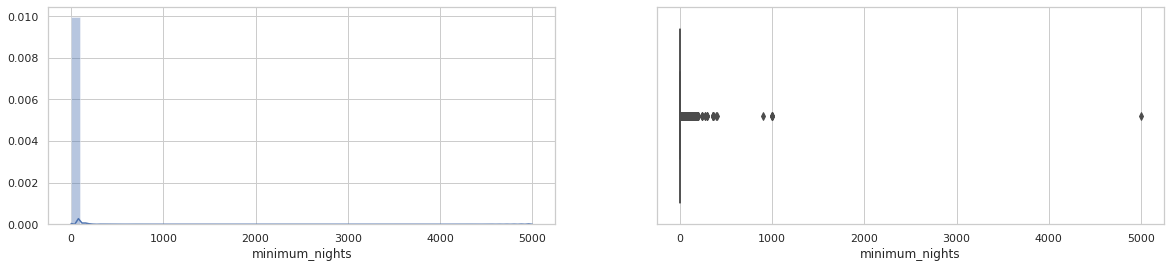

In [37]:
# minimum_nights
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['minimum_nights'])
f.add_subplot(1,2,2)
sns.boxplot(df['minimum_nights'])

number_of_reviews

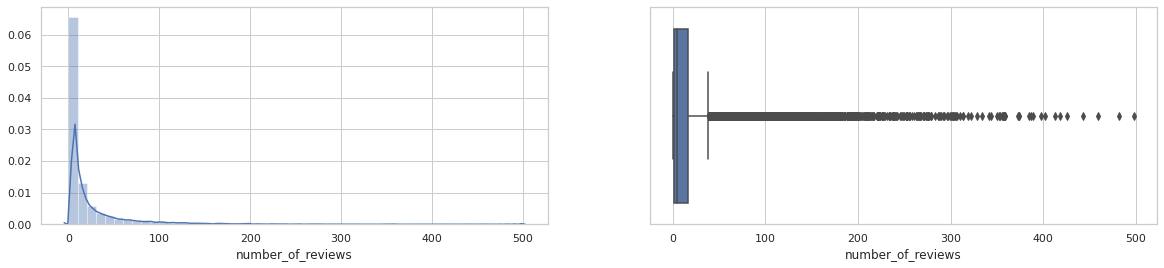

In [38]:
# number_of_reviews
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['number_of_reviews'])
f.add_subplot(1,2,2)
sns.boxplot(df['number_of_reviews'])

reviews_per_month

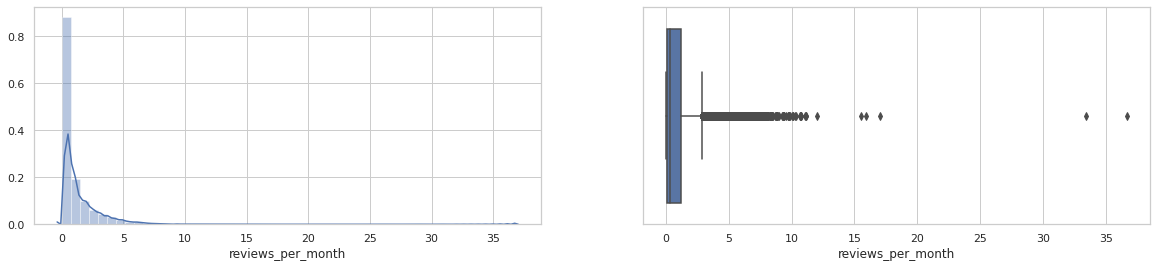

In [39]:
# reviews_per_month
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['reviews_per_month'])
f.add_subplot(1,2,2)
sns.boxplot(df['reviews_per_month'])

calculated_host_listings_count

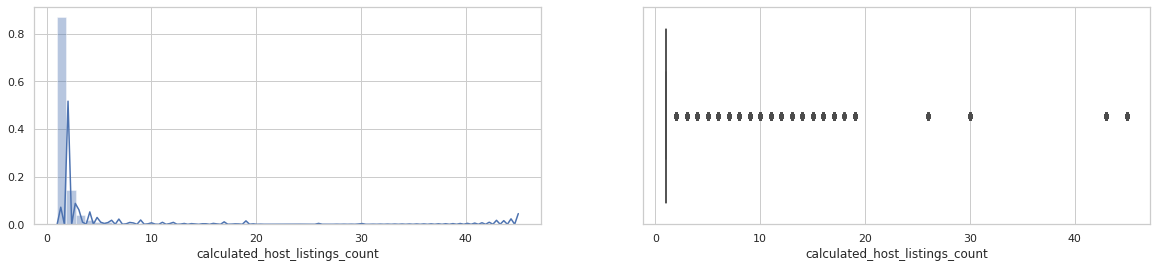

In [40]:
# calculated_host_listings_count
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['calculated_host_listings_count'])
f.add_subplot(1,2,2)
sns.boxplot(df['calculated_host_listings_count'])

availability_365

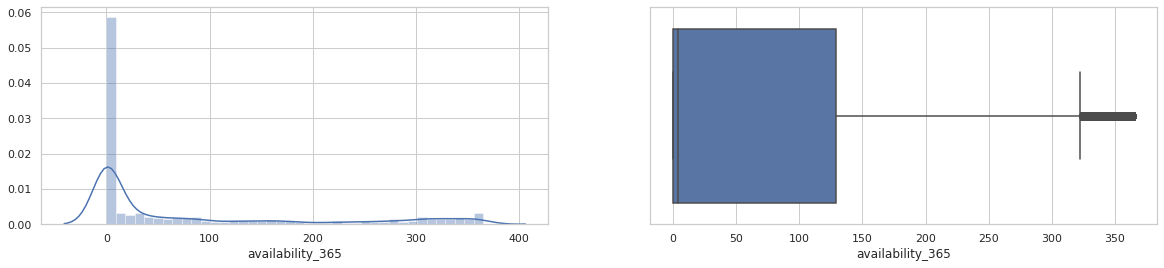

In [41]:
# availability_365
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['availability_365'])
f.add_subplot(1,2,2)
sns.boxplot(df['availability_365'])

### Correlation

In [0]:
data = df.copy()

In [0]:
cols_cat = data.loc[:,(data.dtypes=='object')].columns

In [0]:
data[cols_cat] = data[cols_cat].apply(LabelEncoder().fit_transform)

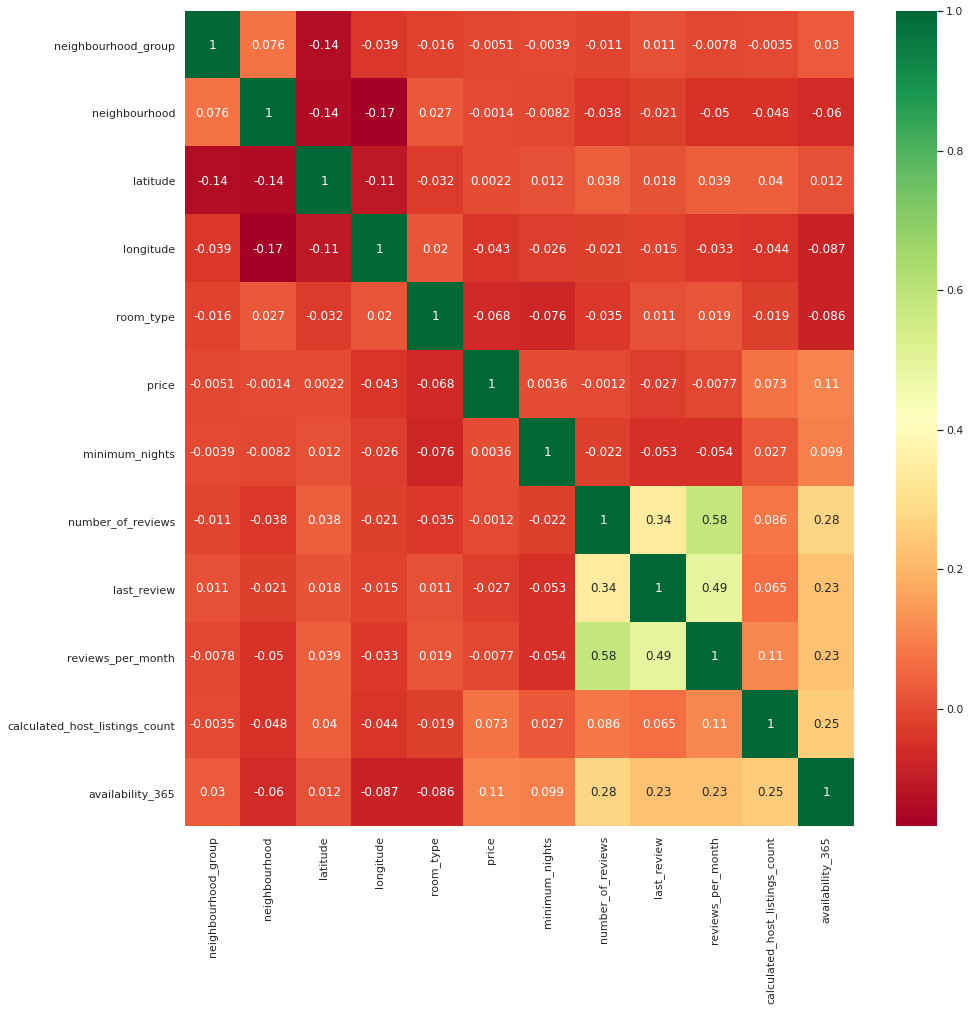

In [45]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Feature Selection

Considering that last_review and review_per_month, then we could use any. and since reviews_per_month has high correlation with number_of_reviews, we could use number_of_reviews to represent both of the features. This is done to prevent noise from the missing values in last_review and reviews_per_month.

In [0]:
df = df.drop(columns=['last_review','reviews_per_month'])

In [47]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,4,141
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,1,0
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,1,297
4,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,1,26
...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,1,314
22548,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,6,78
22549,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,2,15
22550,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,3,6


# K Means Algorithm

In [0]:
# https://www.youtube.com/watch?v=HRoeYblYhkg

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

colors = 10*['g','r','c','b','k']

class K_means:
  def __init__(self, n_clusters=2, tol=0.001, max_iter=300):
    # The number of clusters to form as well as the number of centroids to generate.
    self.n_clusters = n_clusters
    # Relative tolerance with regards to inertia to declare convergence.
    self.tol = tol
    # Maximum number of iterations of the k-means algorithm for a single run.
    self.max_iter = max_iter

  # Fit functions
  def fit(self, data):

    self.centroids = {}

    # Assigning top n_cluster data into centroids
    for i in range(self.n_clusters):
      self.centroids[i] = data[i]

    # Iterations
    for i in range(self.max_iter):
      # The classification of n_clusters
      self.classifications = {}
      # The labeled data
      self.labels_ = []

      # Assigning classification of each centroids to empty list
      for i in range(self.n_clusters):
        self.classifications[i] = []

      # Computing the distance between centroids, to find the nearest centroid
      for featureset in data:
        # Euclidian distances
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        # Find the minimum distace between clusters
        classification = distances.index(min(distances))
        self.labels_.append([featureset[0], featureset[1], classification])
        self.classifications[classification].append(featureset)

      # Assigning original_centroids to prev_centroids
      prev_centroids = dict(self.centroids)

      # Assigning new centroids
      for classification in self.classifications:
        self.centroids[classification] = np.average(self.classifications[classification], axis=0)


      optimum = True
      
      # Searching optimum centroid, tolerance < self.tol
      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid*100.0)>self.tol:
          optimum = False
        if optimum==True:
          break

# Experiment 1

From Problem to ML Solution
1. Articulate Your Problem Clearly

In this experiment the writer would like to know the amount of clusters in price and number_of reviews

2. Identify Your Data Sources

In this experiment we will use 22552 unlabeled data. The decision here is to find out the clusters between room_type in the dataset.

3. Identify Potential Learning Problems

> - The features are noisy and has outliers


4. Think About Potential Bias and Ethics

The writer thinks that there are no Bias and Ethics concerns in this experiment

In [0]:
df_exp1 = df[['number_of_reviews','price']].copy()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


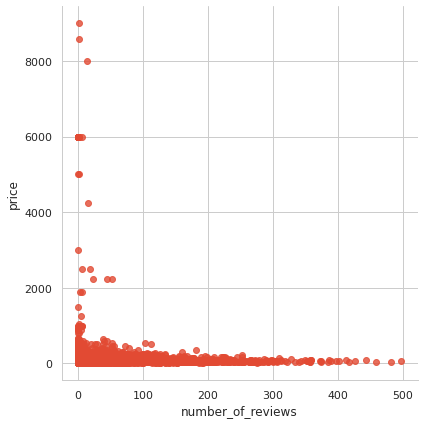

In [174]:
sns.set_style('whitegrid')
sns.lmplot('number_of_reviews','price',data=df_exp1,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [175]:
X = df_exp1.values
X

array([[118,  60],
       [  6,  17],
       [143,  90],
       ...,
       [  0,  85],
       [  0,  99],
       [  0,  45]])

## Elbow Method
Searching for the optimum number of clusters using elbow method

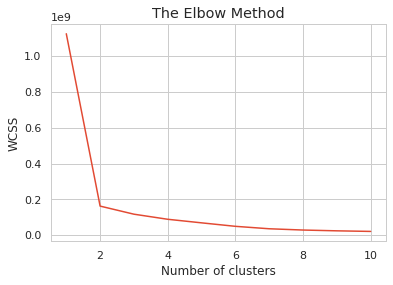

In [176]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The best number of cluster shown by the elbow method is 2.

K=2

## Fit Model

In [0]:
clf = K_means(n_clusters=2)
clf.fit(X)

## Show Clusters (Slow)

PRECAUTION THIS METHOD IS REALLY SLOW

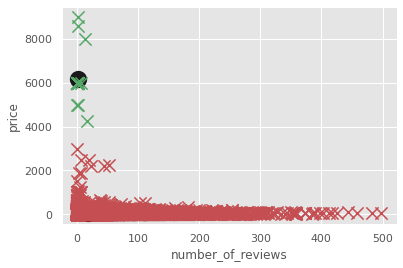

In [76]:
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
              marker='o', color='k', s=150, linewidth=5)
  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)

plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.show()

## Show Clusters (RECOMMENDED)

In [178]:
df_result = pd.DataFrame(clf.labels_)
df_result

,0,1,2
0,118,60,1
1,6,17,1
2,143,90,1
3,25,26,1
4,197,42,1
...,...,...,...
22547,0,60,1
22548,0,20,1
22549,0,85,1
22550,0,99,1


In [179]:
df_exp1['number_of_reviews'] = df_result.loc[:,0]
df_exp1['price'] = df_result.loc[:,1]
df_exp1['label'] = df_result.loc[:,2]
df_exp1

,number_of_reviews,price,label
0,118,60,1
1,6,17,1
2,143,90,1
3,25,26,1
4,197,42,1
...,...,...,...
22547,0,60,1
22548,0,20,1
22549,0,85,1
22550,0,99,1


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


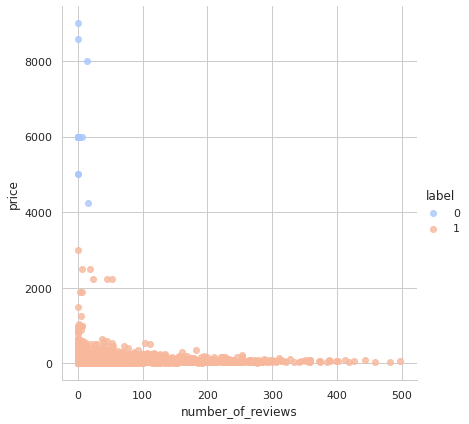

In [180]:
sns.set_style('whitegrid')
sns.lmplot('number_of_reviews','price',data=df_exp1, hue='label',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

## In Conclusion

There are 2 clusters:

cluster 0:
- low reviews
- expensive

cluster 1:
- high reviews
- moderate price

In [0]:
# to_csv

# df_exp1.to_csv('df_exp1.csv')

# Experiment 2

From Problem to ML Solution
1. Articulate Your Problem Clearly

In this experiment the writer would like to know the amount of clusters in price and minimum_nights

2. Identify Your Data Sources

In this experiment we will use 22552 unlabeled data. The decision here is to find out the clusters between room_type in the dataset.

3. Identify Potential Learning Problems

> - The features are noisy and has outliers


4. Think About Potential Bias and Ethics

The writer thinks that there are no Bias and Ethics concerns in this experiment

In [0]:
df_exp2 = df[['price','minimum_nights']].copy()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


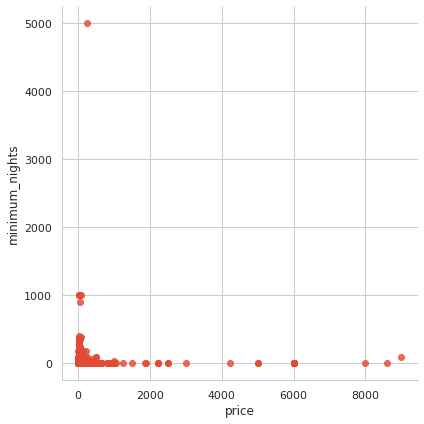

In [163]:
sns.set_style('whitegrid')
sns.lmplot('price','minimum_nights',data=df_exp2,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [164]:
X = df_exp2.values
X

array([[60,  4],
       [17,  2],
       [90, 62],
       ...,
       [85,  3],
       [99,  1],
       [45,  5]])

## Elbow Method
Searching for the optimum number of clusters using elbow method

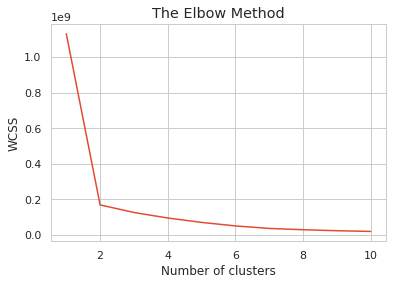

In [165]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fit the Model

In [0]:
clf = K_means(n_clusters=2)
clf.fit(X)

## Show Clusters (Slow)

PRECAUTION THIS METHOD IS REALLY SLOW

In [0]:
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
              marker='o', color='k', s=150, linewidth=5)
  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidths=5)

plt.xlabel('price')
plt.ylabel('minimum_nights')
plt.show()

## Show Clusters (RECOMMENDED)

In [167]:
df_result = pd.DataFrame(clf.labels_)
df_result

,0,1,2
0,60,4,1
1,17,2,1
2,90,62,1
3,26,5,1
4,42,2,1
...,...,...,...
22547,60,2,1
22548,20,1,1
22549,85,3,1
22550,99,1,1


In [169]:
df_exp2['price'] = df_result.loc[:,0]
df_exp2['minimum_nights'] = df_result.loc[:,1]
df_exp2['label'] = df_result.loc[:,2]
df_exp2

,price,minimum_nights,label
0,60,4,1
1,17,2,1
2,90,62,1
3,26,5,1
4,42,2,1
...,...,...,...
22547,60,2,1
22548,20,1,1
22549,85,3,1
22550,99,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


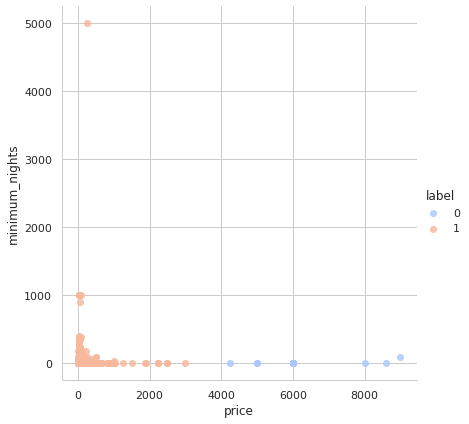

In [171]:
sns.set_style('whitegrid')
sns.lmplot('price','minimum_nights',data=df_exp2, hue='label',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

## In Conclusion

There are 2 clusters:

cluster 0:
- lower minimum_nights
- expensive

cluster 1:
- moderate to high minimum_nights
- moderate price

In [0]:
# to_csv

# df_exp2.to_csv('df_exp2.csv')